# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from weather_api_key import weather_api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

number = -1
skip=0
city_name=[]
temp=[]
cloud=[]
country=[]
date=[]
hum=[]
latit=[]
long=[]
wind=[]
num=[]
print("Beginning of data collection")
print("--------------------------------")
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        temp.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        latit.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        number+=1
        num.append(number)
        print("Processing record  " +str(number+1)+ " and " + str(skip) + " skipped" + "|" + response['name'])
    except KeyError:
        skip+=1
        print(f"City was not found. Skiping... ")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
weather_dic = {"City ID": num,"City": city_name, "Cloudiness":cloud, "Country":country, "Date": date, 
               "Humidity": hum, "Lat":latit, "Lng":long, "Max Temp": temp,"Wind Speed": wind}

Beginning of data collection
--------------------------------
Processing record  1 and 0 skipped|Mataura
Processing record  2 and 0 skipped|Atuona
Processing record  3 and 0 skipped|Visnes
Processing record  4 and 0 skipped|Punta Arenas
Processing record  5 and 0 skipped|Goderich
Processing record  6 and 0 skipped|Nome
Processing record  7 and 0 skipped|Busselton
Processing record  8 and 0 skipped|Bubaque
Processing record  9 and 0 skipped|Severo-Kuril'sk
Processing record  10 and 0 skipped|Qaanaaq
Processing record  11 and 0 skipped|Hualmay
City was not found. Skiping... 
Processing record  12 and 1 skipped|Ushuaia
Processing record  13 and 1 skipped|Poum
Processing record  14 and 1 skipped|Jamestown
Processing record  15 and 1 skipped|Wanaka
City was not found. Skiping... 
Processing record  16 and 2 skipped|Itoman
Processing record  17 and 2 skipped|Copiapó
Processing record  18 and 2 skipped|Kamsack
Processing record  19 and 2 skipped|Isangel
Processing record  20 and 2 skipped|Eas

Processing record  165 and 18 skipped|Sompeta
Processing record  166 and 18 skipped|Tezu
City was not found. Skiping... 
Processing record  167 and 19 skipped|Tasiilaq
Processing record  168 and 19 skipped|Emba
Processing record  169 and 19 skipped|Warri
Processing record  170 and 19 skipped|Yerbogachën
City was not found. Skiping... 
Processing record  171 and 20 skipped|Port Blair
Processing record  172 and 20 skipped|George Town
Processing record  173 and 20 skipped|Cherskiy
Processing record  174 and 20 skipped|Tuatapere
Processing record  175 and 20 skipped|Hay River
Processing record  176 and 20 skipped|Praia
Processing record  177 and 20 skipped|‘Ewa Beach
Processing record  178 and 20 skipped|Aransas Pass
Processing record  179 and 20 skipped|Hurghada
Processing record  180 and 20 skipped|Souillac
Processing record  181 and 20 skipped|Lamar
Processing record  182 and 20 skipped|Cidreira
Processing record  183 and 20 skipped|Pevek
Processing record  184 and 20 skipped|Camargo
Pr

Processing record  328 and 33 skipped|Norman Wells
Processing record  329 and 33 skipped|Khāsh
Processing record  330 and 33 skipped|Aswān
Processing record  331 and 33 skipped|Kita
Processing record  332 and 33 skipped|Balkanabat
Processing record  333 and 33 skipped|Baruun-Urt
City was not found. Skiping... 
Processing record  334 and 34 skipped|Urusha
Processing record  335 and 34 skipped|Carballo
Processing record  336 and 34 skipped|Creel
Processing record  337 and 34 skipped|Santa Rita
Processing record  338 and 34 skipped|Keetmanshoop
Processing record  339 and 34 skipped|Saint Anthony
Processing record  340 and 34 skipped|Lithakia
Processing record  341 and 34 skipped|St. George's
City was not found. Skiping... 
Processing record  342 and 35 skipped|Vila Franca do Campo
Processing record  343 and 35 skipped|Tilichiki
Processing record  344 and 35 skipped|Gawler
Processing record  345 and 35 skipped|Walvis Bay
Processing record  346 and 35 skipped|Östersund
Processing record  34

Processing record  488 and 52 skipped|Doctor Arroyo
Processing record  489 and 52 skipped|Labuhan
Processing record  490 and 52 skipped|Zhangjiakou
Processing record  491 and 52 skipped|Vaitape
Processing record  492 and 52 skipped|Kainantu
Processing record  493 and 52 skipped|Ryōtsu-minato
City was not found. Skiping... 
Processing record  494 and 53 skipped|Udachny
City was not found. Skiping... 
Processing record  495 and 54 skipped|Harper
Processing record  496 and 54 skipped|Saint George
Processing record  497 and 54 skipped|Kaabong
City was not found. Skiping... 
Processing record  498 and 55 skipped|Coachella
Processing record  499 and 55 skipped|Aksu
Processing record  500 and 55 skipped|Pombas
Processing record  501 and 55 skipped|Lagoa
Processing record  502 and 55 skipped|Key West
Processing record  503 and 55 skipped|Rakkestad
City was not found. Skiping... 
Processing record  504 and 56 skipped|Springdale
Processing record  505 and 56 skipped|Presidencia Roque Sáenz Peña


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Building DataFrame and saving the same to csv file
weather_data = pd.DataFrame(weather_dic)
weather_data.to_csv(r'../output_data/cities.csv',index=False, header=True)

In [14]:
# Calling csv file to avoid excessive API calls
csv = '../output_data/cities.csv'
weather_data = pd.read_csv(csv)
weather_data.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Mataura,99,NZ,1600107836,90,-46.19,168.86,5.56,3.58
1,1,Atuona,6,PF,1600107837,77,-9.80,-139.03,25.41,7.53
2,2,Visnes,75,NO,1600107837,87,59.36,5.22,15.00,3.60
3,3,Punta Arenas,40,CL,1600107837,65,-53.15,-70.92,7.00,14.40
4,4,Goderich,48,CA,1600107837,64,43.75,-81.72,17.22,5.90


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
# Skipping this step since there are no cities with humidity > 100% in the DataFrame

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

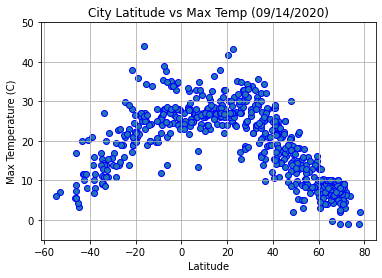

In [16]:
# Scatter plot for Latitude vs Temperature
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", edgecolors="blue")

# Create today's timestamp
today_date = pd.Timestamp("today").strftime("%m/%d/%Y")

# Graph properties
plt.title(f"City Latitude vs Max Temp ({today_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylim(-5, 50)
plt.grid(True)

# Save the graph
plt.savefig("../output_data/Latitude_vs_Max_Temperature.png")

### *Maximun temperature apears to show higher values toward equator area. This observation allow us to state that temperature tend to increase from poles to equator line.

## Latitude vs. Humidity Plot

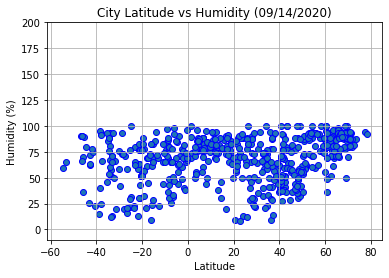

In [17]:
# Scatter plot for Latitude vs Humidity
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", edgecolors="blue")

# Graph properties
plt.title(f"City Latitude vs Humidity ({today_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 200)
plt.grid(True)

# Save the graph
plt.savefig("../output_data/Latitude_vs_Humidity.png")

### *Humidity distribution along the equator line does not show any noticable trend, only some humidity density fluctuation at different latitudes

## Latitude vs. Cloudiness Plot

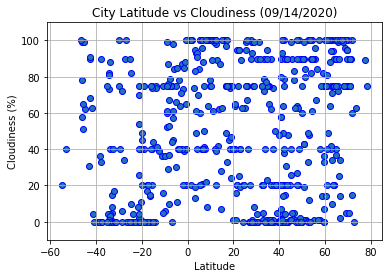

In [18]:
# Scatter plot for Latitude vs Cloudiness
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", alpha=1, edgecolors="blue")

# Graph properties
plt.title(f"City Latitude vs Cloudiness ({today_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 110)
plt.grid(True)

# Save the graph
plt.savefig("../output_data/Latitude_vs_Cloudiness.png")

### *Cloudiness distribution along the equator line does not show any noticable trend

## Latitude vs. Wind Speed Plot

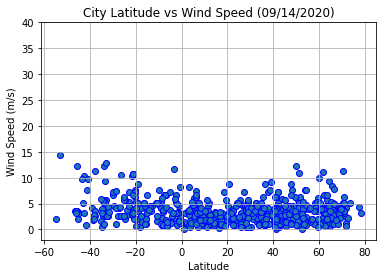

In [19]:
# Scatter plot for Latitude vs Wind Speed
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", edgecolors="blue")

# Graph properties
plt.title(f"City Latitude vs Wind Speed ({today_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylim(-2, 40)
plt.grid(True)

# Save the graph
plt.savefig("../output_data/Latitude_vs_Wind_Speed.png")

### *Wind speed seems to show higher trends at lower latitudes (-20 to -60), the rest area has more/less even wind speed distribution

## Linear Regression

In [20]:
# Function to create Linear Regression line
reg_line = ""
def regress(x, y):   
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regress_values = x*slope + intercept
    global reg_line
    reg_line = "y= " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    plt.plot(x, regress_values, "r-", label = "Regression")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
# North and South Hemisphere DataFrames
weather_data
north_hem = weather_data.loc[weather_data["Lat"] >= 0, :]
south_hem = weather_data.loc[weather_data["Lat"] < 0, :]

 The r-value is: -0.8292458110322156


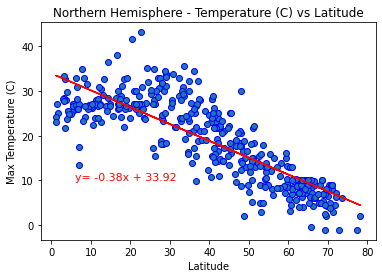

In [22]:
# Scatter plot for Northern Hemisphere - Temperature (C) vs Latitude
plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", edgecolors="blue")
plt.title("Northern Hemisphere - Temperature (C) vs Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
# Linear regression
regress(north_hem['Lat'],north_hem['Max Temp'])
plt.annotate(reg_line, (6, 10), fontsize=11, color="red")
coef = north_hem['Lat'].corr(north_hem['Max Temp'])
# Save the graph
plt.savefig("../output_data/NorthHem_Temp_Lat.png")
print(f" The r-value is: " + str(coef))

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-value is: 0.7762856686195676


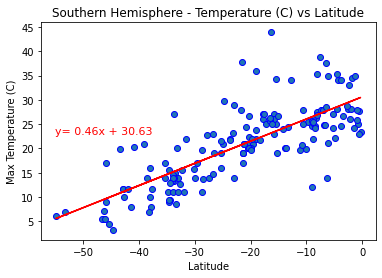

In [25]:
# Scatter plot for Southern Hemisphere - Temperature (C) vs Latitude
plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="o", edgecolors="blue")
plt.title("Southern Hemisphere - Temperature (C) vs Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
# Linear regression
regress(south_hem['Lat'],south_hem['Max Temp'])
plt.annotate(reg_line, (-55, 23), fontsize=11, color="red")
coef = south_hem['Lat'].corr(south_hem['Max Temp'])
# Save the graph
plt.savefig("../output_data/Southern_Temp_Lat.png")
print(f" The r-value is: " + str(coef))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is: 0.15899177870167827


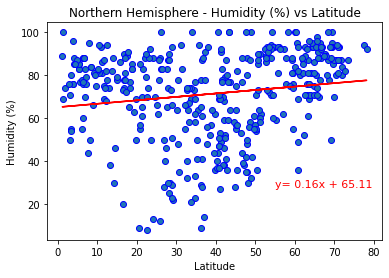

In [28]:
# Scatter plot for Northern Hemisphere - Humidity (%) vs Latitude
plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", edgecolors="blue")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(north_hem['Lat'],north_hem['Humidity'])
plt.annotate(reg_line,(55, 28), fontsize=11, color="red")
coef = north_hem['Lat'].corr(north_hem['Humidity'])
# Save the graph
plt.savefig("../output_data/Northern_Hum_Lat.png")
print(f" The r-value is: " + str(coef))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is: 0.02298841794516886


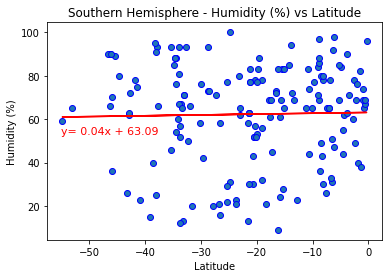

In [56]:
# Scatter plot for Southern Hemisphere - Humidity (%) vs Latitude
plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="o", edgecolors="blue")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(south_hem['Lat'],south_hem['Humidity'])
plt.annotate(reg_line,(-55, 53), fontsize=11, color="red")
coef = south_hem['Lat'].corr(south_hem['Humidity'])
# Save the graph
plt.savefig("../output_data/Southern_Hum_Lat.png")
print(f" The r-value is: " + str(coef))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is: 0.01736425404129688


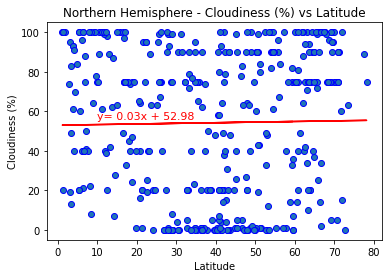

In [32]:
# Scatter plot for Northern Hemisphere - Cloudiness (%) vs Latitude
plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", edgecolors="blue")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(north_hem['Lat'],north_hem['Cloudiness'])
plt.annotate(reg_line,(10, 56), fontsize=11, color="red")
coef = north_hem['Lat'].corr(north_hem['Cloudiness'])
# Save the graph
plt.savefig("../output_data/Northern_Cloud_Lat.png")
print(f" The r-value is: " + str(coef))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is: 0.1746593105059248


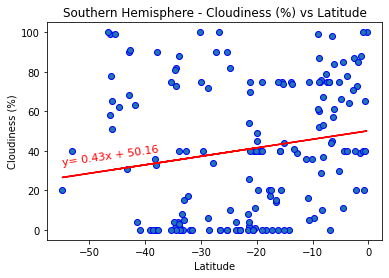

In [53]:
# Scatter plot for Southern Hemisphere - Cloudiness (%) vs Latitude
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="o", edgecolors="blue")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(south_hem['Lat'],south_hem['Cloudiness'])
plt.annotate(reg_line,(-55, 33), fontsize=11, color="red", rotation="8")
coef = south_hem['Lat'].corr(south_hem['Cloudiness'])
# Save the graph
plt.savefig("../output_data/Southern_Cloud_Lat.png")
print(f" The r-value is: " + str(coef))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is: 0.14742424303415178


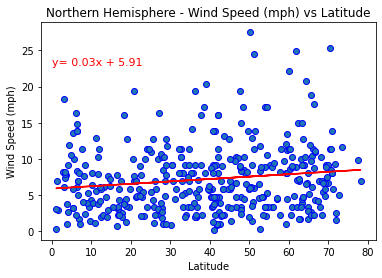

In [38]:
# Scatter plot for Northern Hemisphere -  Wind Speed (m/s) vs Latitude
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"]*2.237, marker="o", edgecolors="blue")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(north_hem['Lat'],north_hem['Wind Speed']*2.237)
plt.annotate(reg_line,(0, 23), fontsize=11, color="red")
coef = north_hem['Lat'].corr(north_hem['Wind Speed']*2.237)
# Save the graph
plt.savefig("../output_data/Northern_Wind_Lat.png")
print(f" The r-value is: " + str(coef))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is: -0.2208052551781539


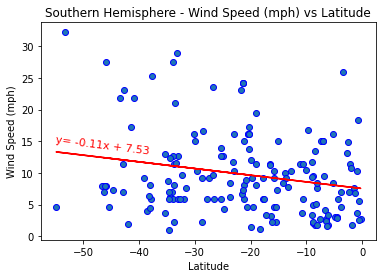

In [52]:
# Scatter plot for Southern Hemisphere -  Wind Speed (mph) vs Latitude
plt.scatter(south_hem["Lat"], south_hem["Wind Speed"]*2.237, marker="o", edgecolors="blue")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude")
plt.xlabel("Latitude")
# Linear regression
regress(south_hem['Lat'],south_hem['Wind Speed']*2.237)
plt.annotate(reg_line,(-55, 13), fontsize=11, color="red", rotation="353")
coef = south_hem['Lat'].corr(south_hem['Wind Speed']*2.237)
# Save the graph
plt.savefig("../output_data/Southern_Wind_Lat.png")
print(f" The r-value is: " + str(coef))